# Network Analysis

Importo i csv

In [22]:
import pandas as pd

nodes = pd.read_csv("data/ue_25m_1750_N.csv")
edges = pd.read_csv("data/ue_25m_1750_E.csv")

Rinomino le colonne ed elimino quelle inutili inerenti alla grafica del grafo di Gephi

In [23]:
ncol = ['name', 'label', 'width', 'height','x', 'y', 'color', 'twitter_type','created_at', 'lang', 
        'friends_count', 'followers_count', 'emoji_html_decimal', 'emoji_utf8']
ndrop = ['label', 'width', 'height','x', 'y','created_at', 'color', 'emoji_html_decimal', 'emoji_utf8']


nodes.columns=ncol
nodes= nodes.drop(ndrop,axis=1)

edges = edges.drop(['weight DOUBLE', 'directed BOOLEAN', 'color VARCHAR'], axis=1)
edges.columns=['source', 'target']

In [24]:
print("nodi:" + str(len(nodes)))
print("link:" + str(len(edges)))

nodi:18325
link:34714


Uso modalità MULTIDIGRAPH, perchè il grafo è diretto e possono esserci più link con stessa origine e stesso arrrivo

In [25]:
edges

,source,target
0,@aleguerani,1132269200846856192
1,@_marcov_,1132265630458105858
2,1132265630458105858,#fuorisede
3,1132265630458105858,https://www.possibile.com/astenuti-non-scelta-...
4,1132265630458105858,http://pbs.twimg.com/media/D7adf3NX4AA3Uw_.jpg
...,...,...
34709,@bonnefouxc,@am_delafrance
34710,@bonnefouxc,1132018003749396480
34711,@laufan845,1132312900499120128
34712,@laufan845,@europarl_it


In [26]:
import networkx as nx

net = nx.from_pandas_edgelist(edges, create_using=nx.MultiDiGraph())

In [27]:
nodes.head(20)

,name,twitter_type,lang,friends_count,followers_count
0,1132269200846856192,Tweet,it,NaN,NaN
1,@aleguerani,User,NaN,804.0,5807.0
2,1132265630458105858,Tweet,it,NaN,NaN
3,@_marcov_,User,NaN,4574.0,2672.0
4,#fuorisede,Hashtag,NaN,NaN,NaN
5,https://www.possibile.com/astenuti-non-scelta-...,Link,NaN,NaN,NaN
6,http://pbs.twimg.com/media/D7adf3NX4AA3Uw_.jpg,Media,NaN,NaN,NaN
7,1132269202319007744,Tweet,en,NaN,NaN
8,@syn_efou,User,NaN,139.0,109.0
9,#voteforclimate,Hashtag,NaN,NaN,NaN


In [28]:
edges.head()

,source,target
0,@aleguerani,1132269200846856192
1,@_marcov_,1132265630458105858
2,1132265630458105858,#fuorisede
3,1132265630458105858,https://www.possibile.com/astenuti-non-scelta-...
4,1132265630458105858,http://pbs.twimg.com/media/D7adf3NX4AA3Uw_.jpg


In [29]:
print(' Nodes:', net.number_of_nodes(), '\n',
      'Edges:', net.number_of_edges(), '\n',
      'Selfloops:', net.number_of_selfloops(),  '\n',
      'Connected:', nx.is_strongly_connected(net), '\n',
      'Biparted:', nx.is_bipartite(net),  '\n',
        'Directed:',nx.is_directed(net),  '\n',
      'Isolates:', nx.number_of_isolates(net), '\n',
      'Strongly connected components:', nx.number_strongly_connected_components(net), '\n',
      'Weakly connected components:', nx.number_weakly_connected_components(net))

 Nodes: 18325 
 Edges: 34714 
 Selfloops: 119 
 Connected: False 
 Biparted: False 
 Directed: True 
 Isolates: 0 
 Strongly connected components: 18251 
 Weakly connected components: 313


In [30]:
print('User', sum(nodes['twitter_type']=='User'))
print('Tweet', sum(nodes['twitter_type']=='Tweet'))
print('Hashtag', sum(nodes['twitter_type']=='Hashtag'))
print('Media', sum(nodes['twitter_type']=='Media'))
print('Link', sum(nodes['twitter_type']=='Link'))

User 6196
Tweet 7748
Hashtag 2262
Media 1156
Link 963


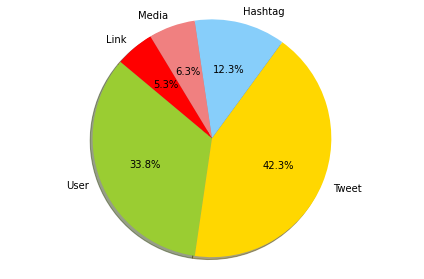

In [31]:
import matplotlib.pyplot as plt

labels = ['User', 'Tweet', 'Hashtag', 'Media', 'Link']
sizes = [6196, 7748, 2262, 1156, 963]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red']

plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.tight_layout()
plt.show()

## Componenti


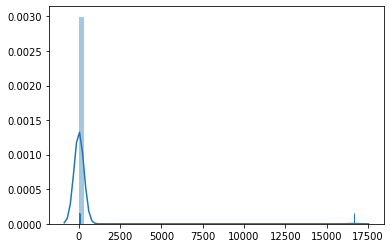

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot([len(i) for i in nx.weakly_connected_components(net)],hist=True, rug=True)

In [33]:
dim_wcomp = [len(i) for i in nx.weakly_connected_components(net)]
dim_wcomp.sort(reverse=1)
dim_wcomp[:5]
#dimensione delle grosse componenti connesse

[16644, 40, 30, 20, 19]

In [34]:
[i/net.number_of_nodes() for i in dim_wcomp[:5]]

[0.9082673942701228,
 0.00218281036834925,
 0.0016371077762619372,
 0.001091405184174625,
 0.0010368349249658935]

In [35]:
len([i for i in nx.weakly_connected_components(net)])

313

In [36]:
#big è la più grossa componente wconnessa

wcomp = [i for i in nx.weakly_connected_components(net)]
bignodes = wcomp[0]
big = net.subgraph(bignodes)
len(big)

16644

In [37]:
len(big.edges)

32892

In [38]:
n_nodes = len(nodes)
n_edges = len(edges)
density = n_edges/(n_nodes*(n_nodes-1))
density

0.00010338092000501509

In [39]:
#La densità della rete totale e della componente più grossa è quasi uguale
32892/(16644*16643)

0.00011874107086424655

In [40]:
net_notmulti = nx.from_pandas_edgelist(edges)

In [41]:

len(net_notmulti.edges)/(len(net_notmulti.nodes)*(len(net_notmulti.nodes)-1))

0.00010205567631652538

# Analisi grado

In [42]:
degree_sequence = list(d for n, d in net.degree()) # degree sequence

degree_sequence.sort(reverse=True)
degree_sequence[:10]

[523, 417, 371, 210, 208, 207, 206, 204, 183, 169]

In [43]:
indegree_sequence = list(d for n,d in net.in_degree())
indegree_sequence.sort(reverse=True)
indegree_sequence[:10]

[523, 409, 369, 208, 207, 206, 204, 203, 178, 159]

In [44]:
outdegree_sequence = list(d for n,d in net.out_degree())
outdegree_sequence.sort(reverse=True)
outdegree_sequence[:10]

[52, 51, 43, 39, 34, 34, 30, 30, 30, 27]

,name,twitter_type,lang,friends_count,followers_count,deg,indeg,outdeg
0,1132269200846856192,Tweet,it,NaN,NaN,3,2,1
1,@aleguerani,User,NaN,804.0,5807.0,4,1,3
2,1132265630458105858,Tweet,it,NaN,NaN,45,42,3
3,@_marcov_,User,NaN,4574.0,2672.0,42,41,1
4,#fuorisede,Hashtag,NaN,NaN,NaN,25,25,0


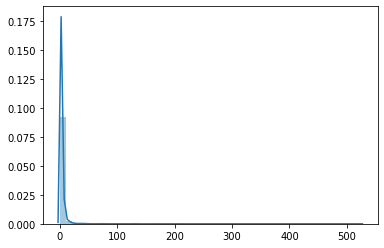

In [45]:
deg = degree_sequence
indeg = indegree_sequence
outdeg = outdegree_sequence

nodes["deg"]= [net.degree(i) for i in nodes['name']]
nodes["indeg"]= [net.in_degree(i) for i in nodes['name']]
nodes["outdeg"]= [net.out_degree(i) for i in nodes['name']]


sns.distplot(deg,hist=True)
nodes.head()


In [46]:

import seaborn as sns

nodiutenti=nodes.iloc[[nodes["name"][i][0]=="@" for i in range(len(nodes))]]
nodiutenti.head()

,name,twitter_type,lang,friends_count,followers_count,deg,indeg,outdeg
1,@aleguerani,User,NaN,804.0,5807.0,4,1,3
3,@_marcov_,User,NaN,4574.0,2672.0,42,41,1
8,@syn_efou,User,NaN,139.0,109.0,1,0,1
11,@fotiosdaglis,User,NaN,1681.0,9091.0,9,0,9
20,@pankar29,User,NaN,2273.0,2084.0,46,3,43


/home/gambit/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/gambit/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


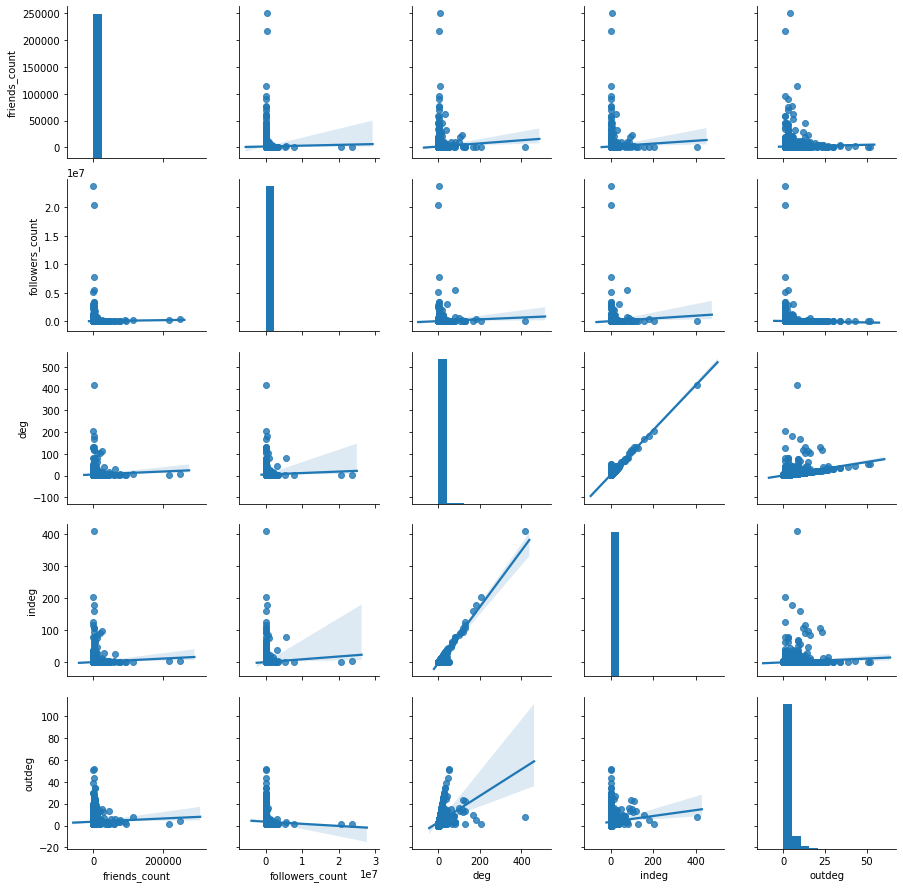

In [47]:
nodiutentiplot=nodiutenti[["friends_count", "followers_count","deg","indeg","outdeg"]]
g = sns.pairplot(nodiutentiplot,   kind="reg")

In [152]:
nodiutenti[nodiutenti["friends_count"]>130000]

,name,twitter_type,lang,friends_count,followers_count,deg,indeg,outdeg
2450,@eliistender10,User,NaN,217616.0,226646.0,4,3,1
6622,@robertbohan,User,NaN,249955.0,315691.0,8,4,4


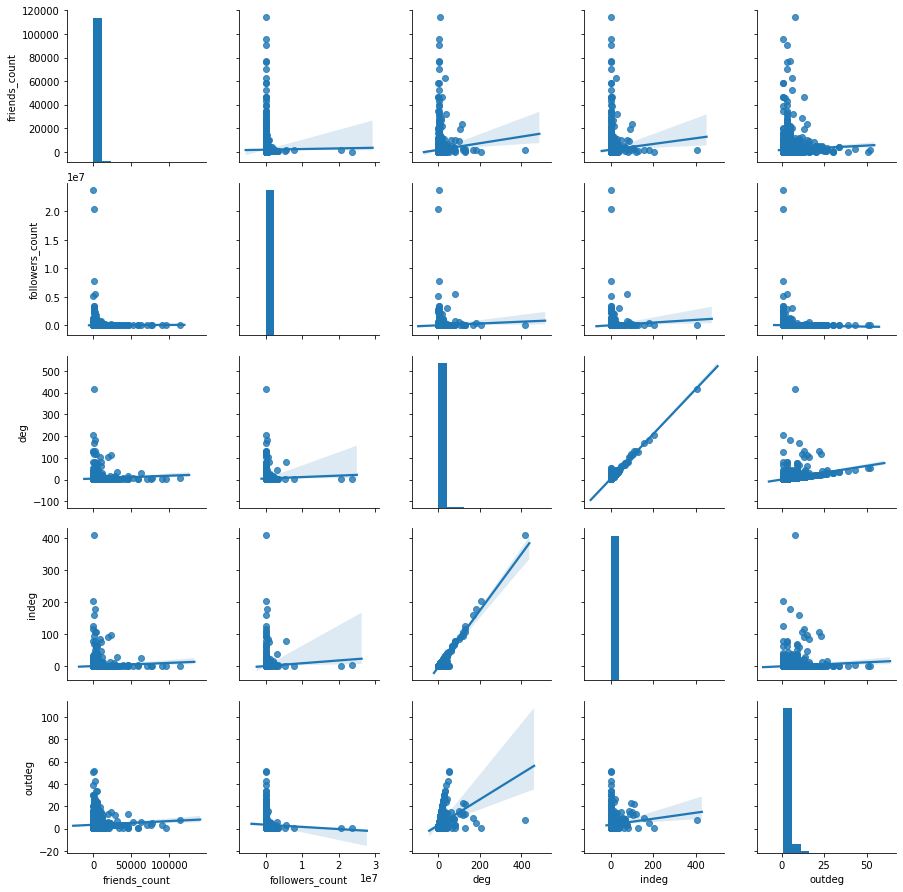

In [153]:
nodiutentinorm = nodiutenti[nodiutenti["friends_count"]<130000]

nodiutentinormplot=nodiutentinorm[["friends_count", "followers_count","deg","indeg","outdeg"]]
g = sns.pairplot(nodiutentinormplot,   kind="reg")

In [147]:
nodiutenti[nodiutenti["indeg"]>100]

,name,twitter_type,lang,friends_count,followers_count,deg,indeg,outdeg
33,@mollymep,User,NaN,1428.0,37830.0,169,159,10
92,@verajourova,User,NaN,236.0,32445.0,128,127,1
267,@guyverhofstadt,User,NaN,1595.0,381819.0,183,178,5
282,@pe_italia,User,NaN,2301.0,18256.0,130,108,22
319,@europeelects,User,NaN,107.0,73313.0,131,118,13
453,@fahraht,User,NaN,0.0,258.0,204,203,1
783,@syuliasalazar,User,NaN,3255.0,4437.0,118,106,12
1770,@the3million,User,NaN,1189.0,36104.0,417,409,8


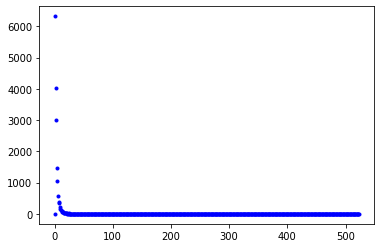

In [48]:
hist_deg = nx.degree_histogram(net)
plt.plot(range(len(hist_deg)), hist_deg, '.', color="b")

[]

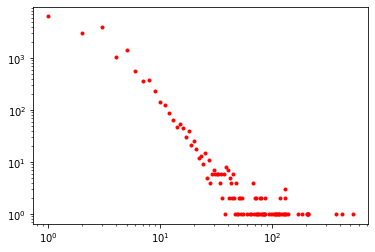

In [49]:
plt.plot(range(0, len(hist_deg)), hist_deg, ".", label='Grado', color='r')
plt.loglog()

per ogni tipo di nodo i primi 5 più grado alto

In [50]:
for tipo in list(set(nodes.twitter_type)):
    print(tipo)
    print(nodes[nodes['twitter_type']==tipo]['deg'].sort_values(ascending=False)[:5])

Link
747      39
5852     35
9634     25
6089     22
13302    20
Name: deg, dtype: int64
Tweet
4002    371
452     210
871     134
91      131
89      129
Name: deg, dtype: int64
Media
786      16
15666    12
15667    12
15668    12
2144      8
Name: deg, dtype: int64
Hashtag
94     523
84     208
227    207
67     206
154    138
Name: deg, dtype: int64
User
1770    417
453     204
267     183
33      169
319     131
Name: deg, dtype: int64


In [51]:
nodes.iloc[84,:]

name               #ep2019
twitter_type       Hashtag
lang                   NaN
friends_count          NaN
followers_count        NaN
deg                    208
indeg                  208
outdeg                   0
Name: 84, dtype: object

In [52]:
nodes.iloc[1770,:]

name               @the3million
twitter_type               User
lang                        NaN
friends_count              1189
followers_count           36104
deg                         417
indeg                       409
outdeg                        8
Name: 1770, dtype: object

In [53]:
nodes.iloc[4002,:]

name               1132276135528734720
twitter_type                     Tweet
lang                                en
friends_count                      NaN
followers_count                    NaN
deg                                371
indeg                              369
outdeg                               2
Name: 4002, dtype: object

QUESTO
https://twitter.com/the3million/status/1132276135528734720
    

{'Tweet->Hashtag',
 'Tweet->Link',
 'Tweet->Media',
 'Tweet->User',
 'User->Tweet',
 'User->User'}

In [54]:
nodes.head()

,name,twitter_type,lang,friends_count,followers_count,deg,indeg,outdeg
0,1132269200846856192,Tweet,it,NaN,NaN,3,2,1
1,@aleguerani,User,NaN,804.0,5807.0,4,1,3
2,1132265630458105858,Tweet,it,NaN,NaN,45,42,3
3,@_marcov_,User,NaN,4574.0,2672.0,42,41,1
4,#fuorisede,Hashtag,NaN,NaN,NaN,25,25,0


# USER

In [55]:
users = nodes[nodes['twitter_type']=="User"]
users.sort_values(by='deg', ascending=False)

,name,twitter_type,lang,friends_count,followers_count,deg,indeg,outdeg
1770,@the3million,User,NaN,1189.0,36104.0,417,409,8
453,@fahraht,User,NaN,0.0,258.0,204,203,1
267,@guyverhofstadt,User,NaN,1595.0,381819.0,183,178,5
33,@mollymep,User,NaN,1428.0,37830.0,169,159,10
319,@europeelects,User,NaN,107.0,73313.0,131,118,13
...,...,...,...,...,...,...,...,...
7945,@lozampardo,User,NaN,168.0,8.0,1,0,1
7942,@rezidensrocker,User,NaN,94.0,211.0,1,0,1
14645,@eduardsuvi,User,NaN,NaN,NaN,1,1,0
9383,@diplodigital,User,NaN,2768.0,1218.0,1,0,1


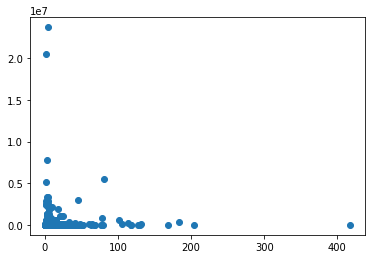

In [56]:
plt.scatter(users.deg,users.followers_count+users.friends_count)
    

RETE UTENTI - connessi per relazioni reciproche

In [57]:
user_rel = [edges.iloc[i,0][0]=="@" and edges.iloc[i,1][0]=="@" for i in range(len(edges))]
edges_user=edges[user_rel]

In [58]:
netuser = nx.from_pandas_edgelist(edges_user, create_using=nx.MultiDiGraph())
netuser

In [59]:
print(' Nodes:', netuser.number_of_nodes(), '\n',
      'Edges:', netuser.number_of_edges(), '\n',
      'Selfloops:', netuser.number_of_selfloops(),  '\n',
      'Connected:', nx.is_strongly_connected(netuser), '\n',
      'Biparted:', nx.is_bipartite(netuser),  '\n',
        'Directed:',nx.is_directed(netuser),  '\n',
      'Isolates:', nx.number_of_isolates(netuser), '\n',
      'Strongly connected components:', nx.number_strongly_connected_components(netuser), '\n',
      'Weakly connected components:', nx.number_weakly_connected_components(netuser))

 Nodes: 5442 
 Edges: 6551 
 Selfloops: 119 
 Connected: False 
 Biparted: False 
 Directed: True 
 Isolates: 0 
 Strongly connected components: 5415 
 Weakly connected components: 593


In [60]:
dim_wcompuser = [len(i) for i in nx.weakly_connected_components(netuser)]
dim_wcompuser.sort(reverse=1)
dim_wcompuser[:5]

[3479, 71, 65, 64, 44]

In [61]:
nx.weakly_connected_components(netuser)

<generator object weakly_connected_components at 0x7f14e13d11a8>

In [62]:
wcompuser = [i for i in nx.weakly_connected_components(netuser)]
bignodesuser = wcompuser[0]
biguser = net.subgraph(bignodesuser)

In [63]:
len(biguser)

3479

In [64]:
degree_sequence_user = list(d for n, d in netuser.degree()) # degree sequence

degree_sequence_user.sort(reverse=True)
degree_sequence_user[:10]

[387, 203, 176, 160, 127, 118, 109, 108, 102, 99]

In [65]:
vett = [netuser.degree(i) for i in nodes['name']]
vett2 = [(-1,vett[i])[type(vett[i])==int] for i in range(len(vett))]

In [66]:
nodes["deguser"]= vett2


In [67]:
nodes.sort_values(by="deguser", ascending=0)[:5]

,name,twitter_type,lang,friends_count,followers_count,deg,indeg,outdeg,deguser
1770,@the3million,User,NaN,1189.0,36104.0,417,409,8,387
453,@fahraht,User,NaN,0.0,258.0,204,203,1,203
267,@guyverhofstadt,User,NaN,1595.0,381819.0,183,178,5,176
33,@mollymep,User,NaN,1428.0,37830.0,169,159,10,160
92,@verajourova,User,NaN,236.0,32445.0,128,127,1,127


In [68]:
vett[2]=="DiMultiDegreeView({})"

False

In [69]:
nx.shortest_path(biguser)

{'@laizydaizey': {'@laizydaizey': ['@laizydaizey'],
  '@the3million': ['@laizydaizey', '@the3million'],
  '@nicolashatton': ['@laizydaizey', '@the3million', '@nicolashatton']},
 '@ana37454709': {'@ana37454709': ['@ana37454709'],
  '@europa_tve': ['@ana37454709', '@europa_tve'],
  '@jduch': ['@ana37454709', '@jduch'],
  '@johnkerry': ['@ana37454709', '@jduch', '@johnkerry']},
 '@economistasgr': {'@economistasgr': ['@economistasgr']},
 '@madden_phil': {'@madden_phil': ['@madden_phil'],
  '@mollymep': ['@madden_phil', '@mollymep'],
  '@verajourova': ['@madden_phil', '@verajourova'],
  '@gravytrainbrit': ['@madden_phil', '@mollymep', '@gravytrainbrit'],
  '@europeelects': ['@madden_phil', '@mollymep', '@europeelects']},
 '@rosariot1970': {'@rosariot1970': ['@rosariot1970'],
  '@stopm5slega': ['@rosariot1970', '@stopm5slega']},
 '@njsfonseca': {'@njsfonseca': ['@njsfonseca'],
  '@europarl_it': ['@njsfonseca', '@europarl_it'],
  '@netflixit': ['@njsfonseca', '@europarl_it', '@netflixit'],
  

In [70]:
nx.shortest_path_length(biguser)

<generator object all_pairs_shortest_path_length at 0x7f14eb6b8830>

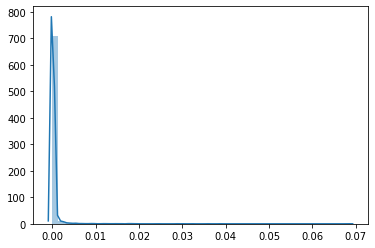

In [71]:
closeness = nx.closeness_centrality(netuser)
sns.distplot(list(closeness.values()))
plt.show()

In [72]:
betweeness = nx.betweenness_centrality(netuser)
sns.distplot(list(betweeness.values()))
plt.show()

KeyboardInterrupt: 

## clustering

In [99]:
biguserundi = biguser.to_undirected()
netundi = net.to_undirected()



18325

In [111]:
from collections import OrderedDict
from operator import itemgetter    

tria_net = nx.triangles(nx.Graph(net))
tria_net_sort = OrderedDict(sorted(tria_net.items(), key = itemgetter(1), reverse = True))

In [114]:
tria_user = nx.triangles(nx.Graph(netuser))
tria_user_sort = OrderedDict(sorted(tria_user.items(), key = itemgetter(1), reverse = True))
tria_user_sort

OrderedDict([('@mollymep', 156),
             ('@the3million', 131),
             ('@verajourova', 126),
             ('@fahraht', 80),
             ('@markruffalo', 75),
             ('@avaaz', 75),
             ('@claude_moraes', 65),
             ('@nickynoo007', 61),
             ('@europeelects', 46),
             ('@finalsayforall', 46),
             ('@guyverhofstadt', 44),
             ('@infomother', 37),
             ('@syuliasalazar', 37),
             ('@joannaccherry', 36),
             ('@europeangreens', 34),
             ('@nicolashatton', 34),
             ('@kurlykrissy', 30),
             ('@chrisschuringa', 29),
             ('@so_ethereal', 27),
             ('@civati', 24),
             ('@markorusso69', 24),
             ('@_marcov_', 22),
             ('@skytg24', 19),
             ('@trippypip', 18),
             ('@frustametafora', 17),
             ('@europarl_it', 16),
             ('@ajayjagota', 16),
             ('@ncpoliticsuk', 16),
             ('@ruzi

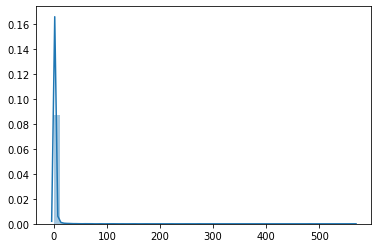

In [138]:
sns.distplot(list(tria_net.values()))


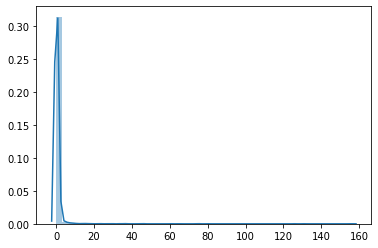

In [139]:
sns.distplot(list(tria_user.values()))


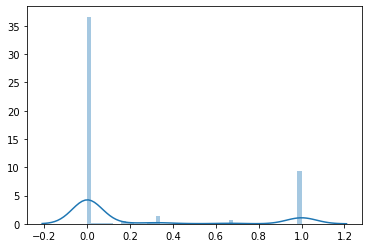

In [121]:
clustuser = nx.clustering(nx.Graph(netuser))
sns.distplot(list(clustuser.values()))


In [123]:
nx.average_clustering(nx.Graph(net))


0.1350886765534672

In [124]:
nx.average_clustering(nx.Graph(netuser))


0.2124084737220594

### diametro

In [126]:
#nx.diameter(biguserundi)

# BA ER

### reti per net

In [83]:
ba = nx.barabasi_albert_graph(18000,2)
er = nx.erdos_renyi_graph(18000, 0.00022)

In [84]:
len(ba.edges)

35996

In [85]:
len(er.edges)

35802

[]

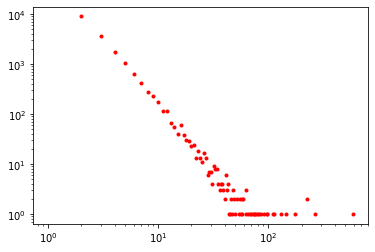

In [91]:
hist_deg = nx.degree_histogram(ba)
plt.plot(range(len(hist_deg)), hist_deg, '.', color="r")
plt.loglog()

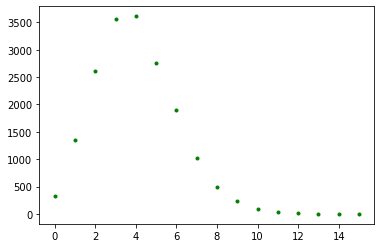

In [89]:
hist_deg = nx.degree_histogram(er)
plt.plot(range(len(hist_deg)), hist_deg, '.', color="g")

### reti per netuser

 Nodes: 5442 
 Edges: 6551 

In [75]:
ba2 = nx.barabasi_albert_graph(544,1)
er2 = nx.erdos_renyi_graph(5442, 0.0004)

In [76]:
print(len(er2.edges()))

6022


In [77]:
len(netuser.edges())

6551

In [78]:
nx.diameter(ba2)

18

In [79]:
nx.connected_components(er2)

<generator object connected_components at 0x7f14eb6ae678>

In [80]:
compser2 = [i for i in nx.connected_components(er2)]
len(compser2[1])

4633

In [81]:
biger2 = er2.subgraph(compser2[1])

In [82]:
nx.diameter(biger2)

25

In [ ]:
len()

In [127]:
nx.average_clustering(ba)


0.0037747033490410677

In [128]:
nx.average_clustering(ba2)


0.0

In [129]:
nx.average_clustering(er)


0.00010577200577200577

In [130]:
nx.average_clustering(er2)


6.125199068969742e-05

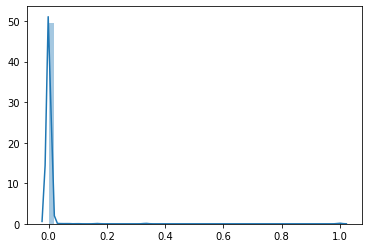

In [131]:
clustba = nx.clustering(ba)
sns.distplot(list(clustba.values()))


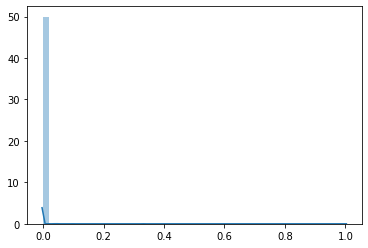

In [133]:
cluster = nx.clustering(er)
sns.distplot(list(cluster.values()))


# IMPORT / EXPORT

In [6]:
import pickle 

#net, netuser, big, biguser

file_net = open("file_net", 'wb') 
pickle.dump(net, file_net)
file_net.close()

In [54]:


file_netuser = open("file_netuser", 'wb') 
pickle.dump(netuser, file_netuser)
file_netuser.close()


AttributeError: Can't pickle local object 'SubMultiDiGraph.__init__.<locals>.<lambda>'